Objective:To implement LDA(Linear Discriminant Analysis) on Mall_Customers Dataset

IMPORTING RELEVANT LIBRARIES

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



# Load data from "Mall_Customers.csv"

In [81]:
np.random.seed(1)
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [82]:
data.shape

(200, 5)

Selecting the relevant features

In [83]:
import seaborn as sns
selected_features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = data[selected_features].values
y = (data['Gender'] == 'Female').astype(int)

# class label for LDA

In [84]:
y#1 to female customers and 0 to male customers. 

0      0
1      0
2      1
3      1
4      1
      ..
195    1
196    1
197    0
198    0
199    0
Name: Gender, Length: 200, dtype: int64

# Applying StandardScaler

In [85]:

def standard_scaler(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std
X_scaled = standard_scaler(X)

# Implementing LDA 
Number of Classes (num_classes):
represents the total number of unique classes in the target labels y.

Class Counts (class_counts):
This array contains the count of samples belonging to each unique class.

Class Labels (unique_classes):
An array containing the distinct class labels present in the target labels y.(Sb)

Class Means (class_means):
A list containing the mean feature vector for each class. Each mean feature vector represents the average feature values for data points within a specific class.

N-components->represents the number of linear discriminants (components) ywe want to retain after performing dimensionality reduction.

Between class scatter = Sb = measures the distance between class means
Within class scatter = Sw = measures the spread around means of each class

In [98]:
def lda_scratch(X, y, n_components=1):
    unique_classes, class_counts = np.unique(y, return_counts=True)#firstly we are finding the unique classes in y and their counts
    num_classes = len(unique_classes)
    class_means = []
    for c in unique_classes:
        class_indices = np.where(y == c)[0]#firstly we are finding the indices of the class c in y
        mean_features = np.mean(X[class_indices], axis=0)#and then we are finding the mean of the features of the class c in X
        class_means.append(mean_features)
    
    overall_mean = np.mean(X, axis=0)
    b_c_s = np.zeros((X.shape[1], X.shape[1]))
    w_c_s = np.zeros((X.shape[1], X.shape[1]))
    
    for i in range(num_classes):
        n_c = class_counts[i]
        diff = (class_means[i] - overall_mean).reshape(-1, 1)
        b_c_s += n_c * np.dot(diff, diff.T)
        class_scatter = np.zeros((X.shape[1], X.shape[1]))
        class_indices = np.where(y == unique_classes[i])[0]
        for idx in class_indices:
            diff = (X[idx] - class_means[i]).reshape(-1, 1)
            class_scatter += np.dot(diff, diff.T)0
        w_c_s += class_scatter
    
    eigenvalues, eigenvectors = np.linalg.eig(np.dot(np.linalg.inv(w_c_s), b_c_s))
    sorted_indices = np.argsort(eigenvalues)[::-1]
    selected_indices = sorted_indices[:n_components]
    transformation_matrix = eigenvectors[:, selected_indices]          #These eigenvectors represent the directions in the feature space that maximize class separability.
    X_lda = np.dot(X_scaled, transformation_matrix)
    return X_lda


In [94]:
k = int(input("Enter the number of clusters (k): "))
X_lda = lda_scratch(X_scaled, y, n_components=1)

# Next,we apply K-means clustering 

In [95]:

def kmeans_scratch(X, k, max_iters=100):
    n_samples, n_features = X.shape
    centroids = X[np.random.choice(n_samples, k, replace=False)]
    
    for _ in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        # Update centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        
        # Check for convergence
        if np.allclose(centroids,new_centroids,atol=1e-4):
            break
        
        centroids = new_centroids
    
    return labels, centroids

labels, centroids = kmeans_scratch(X_lda, k)

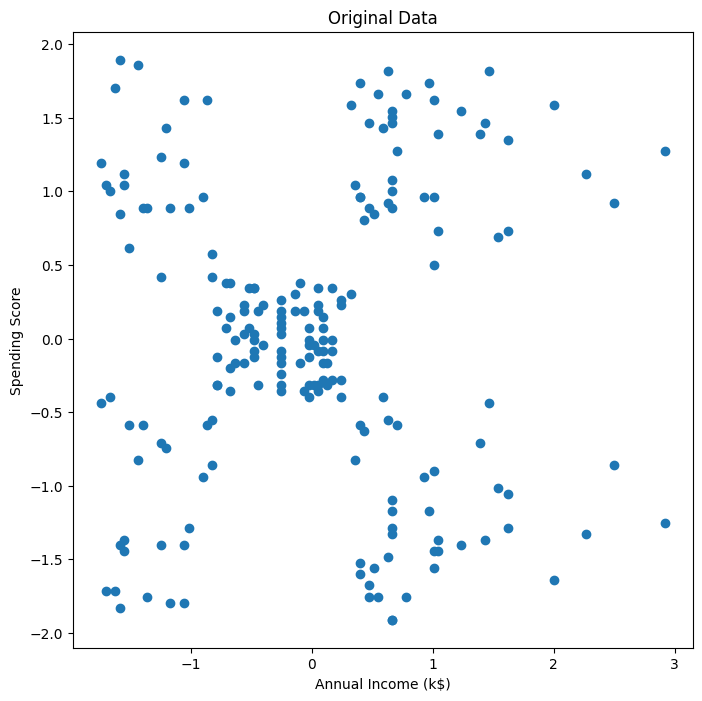

In [96]:
plt.figure(figsize=(8, 8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1])#explain? x[:,0] is the first column of X, x[:,1] is the second column of X<<<<<<<<<<<<<<<<<<
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.title('Original Data')
plt.show()


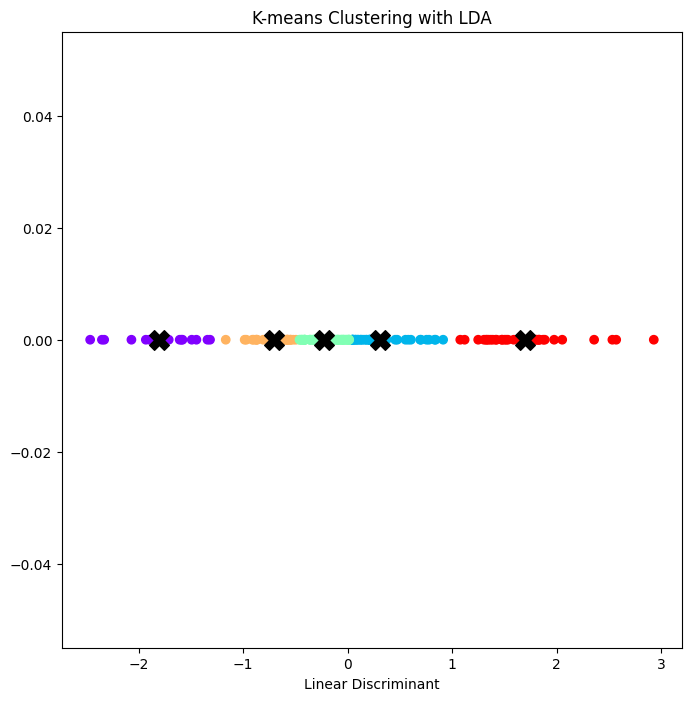

In [97]:
# Visualizing the clusters
plt.figure(figsize=(8, 8))
plt.scatter(X_lda[:, 0], np.zeros(X_lda.shape[0]), c=labels, cmap='rainbow')
plt.scatter(centroids[:, 0], np.zeros(centroids.shape[0]), marker='X', s=200, c='black')
plt.xlabel('Linear Discriminant')
plt.title('K-means Clustering with LDA')
plt.show()

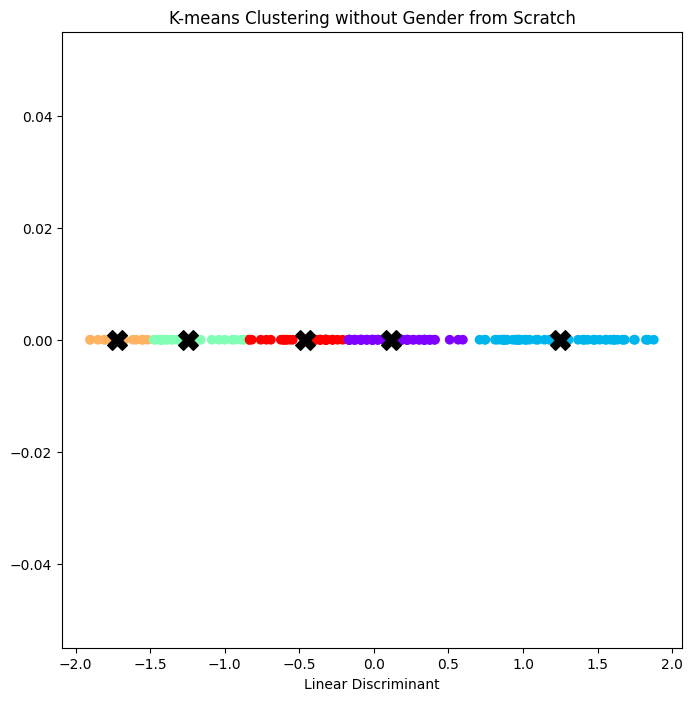

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Load data from "Mall_Customers.csv"
data = pd.read_csv("Mall_Customers.csv")

# Select the relevant features
selected_features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = data[selected_features].values

# Apply StandardScaler
def standard_scaler(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std
X_scaled = standard_scaler(X)

# Implement LDA from scratch
def lda_scratch(X, n_components=1):
    overall_mean = np.mean(X, axis=0)
    
    between_class_scatter = np.zeros((X.shape[1], X.shape[1]))
    within_class_scatter = np.zeros((X.shape[1], X.shape[1]))
    
    class_scatter = np.zeros((X.shape[1], X.shape[1]))
    for i in range(X.shape[0]):
        diff = (X[i] - overall_mean).reshape(-1, 1)
        between_class_scatter += np.dot(diff, diff.T)
        class_scatter += np.dot(diff, diff.T)
    within_class_scatter += class_scatter
    
    eigenvalues, eigenvectors = np.linalg.eig(np.dot(np.linalg.inv(within_class_scatter), between_class_scatter))
    sorted_indices = np.argsort(eigenvalues)[::-1]
    selected_indices = sorted_indices[:n_components]
    transformation_matrix = eigenvectors[:, selected_indices]
    
    X_lda = np.dot(X, transformation_matrix)
    return X_lda

k = int(input("Enter the number of clusters (k): "))
X_lda = lda_scratch(X_scaled, n_components=1)

# Apply k-means clustering from scratch
def kmeans_scratch(X, k, max_iters=100):
    n_samples, n_features = X.shape
    centroids = X[np.random.choice(n_samples, k, replace=False)]
    
    for _ in range(max_iters):
        # Assign each point to the nearest centroid
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        # Update centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        
        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return labels, centroids

labels, centroids = kmeans_scratch(X_lda, k)

# Visualize the clusters
plt.figure(figsize=(8, 8))
plt.scatter(X_lda[:, 0], np.zeros(X_lda.shape[0]), c=labels, cmap='rainbow')
plt.scatter(centroids[:, 0], np.zeros(centroids.shape[0]), marker='X', s=200, c='black')
plt.xlabel('Linear Discriminant')
plt.title('K-means Clustering without Gender from Scratch')
plt.show()


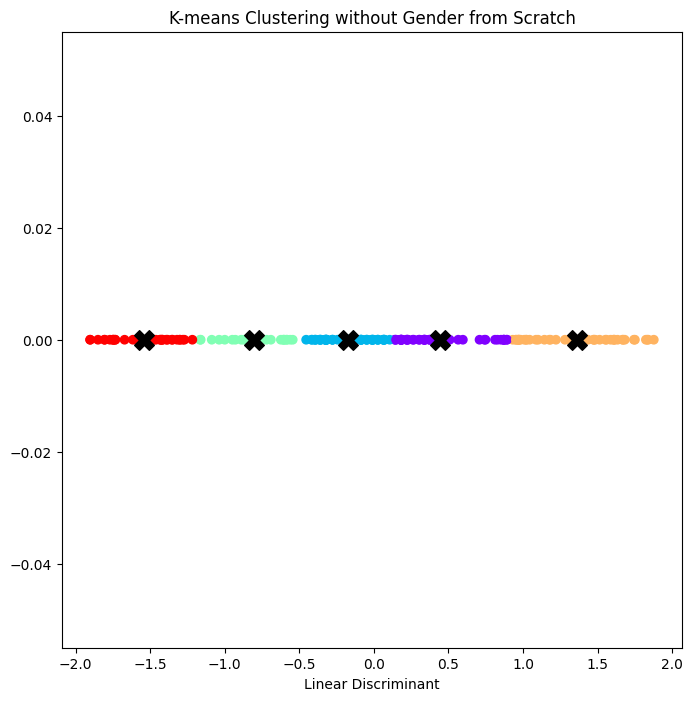

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(5)

# Load data from "Mall_Customers.csv"
data = pd.read_csv("Mall_Customers.csv")

# Select the relevant features
selected_features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = data[selected_features].values

# Apply StandardScaler
def standard_scaler(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std
X_scaled = standard_scaler(X)

# Implement LDA from scratch
def lda_scratch(X, n_components=1):
    overall_mean = np.mean(X, axis=0)
    
    between_class_scatter = np.zeros((X.shape[1], X.shape[1]))
    within_class_scatter = np.zeros((X.shape[1], X.shape[1]))
    
    class_scatter = np.zeros((X.shape[1], X.shape[1]))
    for i in range(X.shape[0]):
        diff = (X[i] - overall_mean).reshape(-1, 1)
        between_class_scatter += np.dot(diff, diff.T)
        class_scatter += np.dot(diff, diff.T)
    within_class_scatter += class_scatter
    
    eigenvalues, eigenvectors = np.linalg.eig(np.dot(np.linalg.inv(within_class_scatter), between_class_scatter))
    sorted_indices = np.argsort(eigenvalues)[::-1]
    selected_indices = sorted_indices[:n_components]
    transformation_matrix = eigenvectors[:, selected_indices]
    
    X_lda = np.dot(X, transformation_matrix)
    return X_lda

k = int(input("Enter the number of clusters (k): "))
X_lda = lda_scratch(X_scaled, n_components=1)

# Apply k-means clustering from scratch
def kmeans_scratch(X, k, max_iters=100):
    n_samples, n_features = X.shape
    centroids = X[np.random.choice(n_samples, k, replace=False)]
    
    for _ in range(max_iters):
        # Assign each point to the nearest centroid
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        # Update centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        
        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return labels, centroids

labels, centroids = kmeans_scratch(X_lda, k)

# Visualize the clusters
plt.figure(figsize=(8, 8))
plt.scatter(X_lda[:, 0], np.zeros(X_lda.shape[0]), c=labels, cmap='rainbow')
plt.scatter(centroids[:, 0], np.zeros(centroids.shape[0]), marker='X', s=200, c='black')
plt.xlabel('Linear Discriminant')
plt.title('K-means Clustering without Gender from Scratch')
plt.show()
